In [1]:
import pywt
import matplotlib.pyplot as plt
from numpy import zeros, arange, fft, linspace, pi, cos, sin, sqrt, array, log10, amax, linspace, log10, unwrap, angle, exp, arctan, convolve, correlate
from numpy.random import normal as noise_gaussian
from pathlib import Path
from math import radians
from os import listdir
from os.path import splitext
import ipywidgets as widgets
from IPython.display import display
from multiprocessing.pool import ThreadPool
from time import process_time
%matplotlib widget

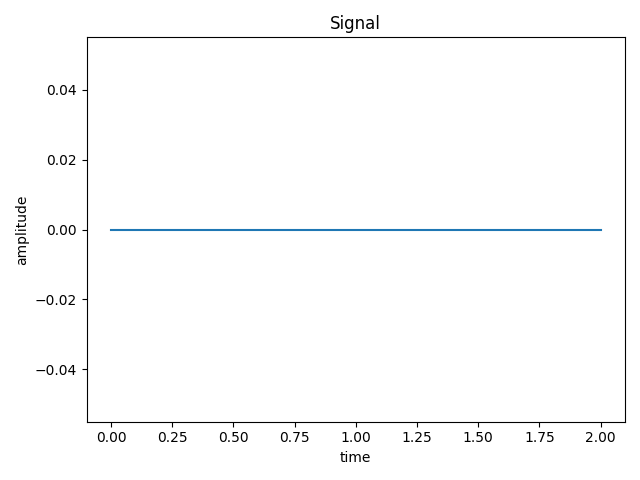

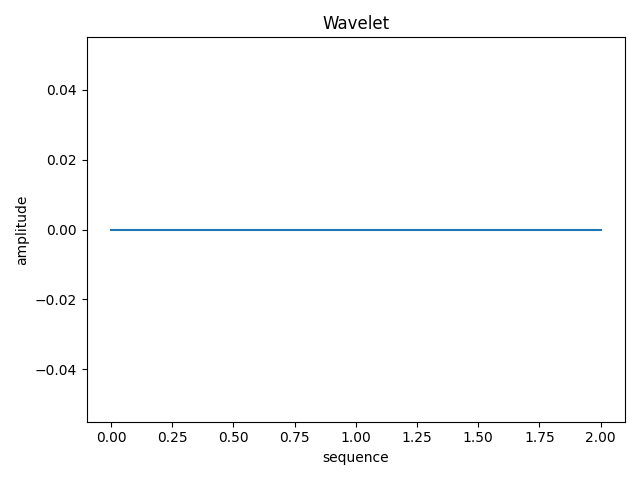

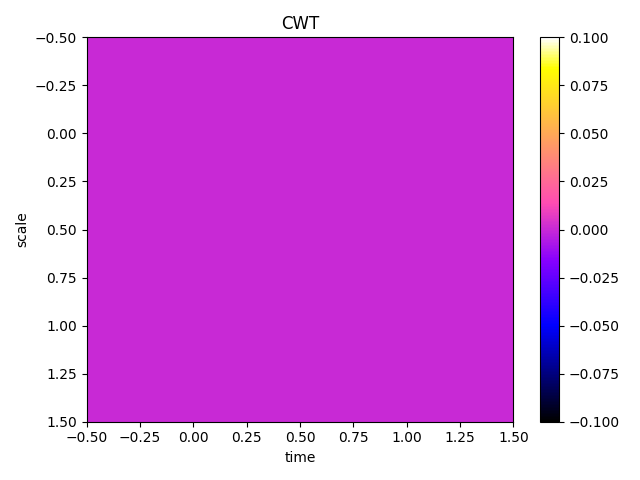

In [5]:
texts_0 = [[], [], []]

def morlet_wavelet(wavelet_length):
    if wavelet_length == 0:
        return [0]
    return [exp(-t**2/2)*cos(5*t) for t in linspace(-2*pi, 2*pi, wavelet_length)]

def gaussian_wavelet(sigma_gaussian, wavelet_length):
    if wavelet_length == 0:
        return [0]
    return [exp(-t**2/(2*sigma_gaussian**2)) for t in linspace(-2*pi, 2*pi, wavelet_length)]

def gaussian_derivative_wavelet(sigma_gaussian, wavelet_length):
    if wavelet_length == 0:
        return [0]
    return [2*t*exp(-t**2/(2*sigma_gaussian**2))/(2*sigma_gaussian**2) for t in linspace(-2*pi, 2*pi, wavelet_length)]

def continuous_wavelet_transform(data, wavelet_type):
    result = zeros((100, len(data)))
    for i in range(100):
        if wavelet_type == "morlet":
            wavelet_function = morlet_wavelet(int(i*1.5))
        if wavelet_type == "gaussian":
            sigma_gaussian = select_sigma_gaussian.get_interact_value()
            wavelet_function = gaussian_wavelet(sigma_gaussian, int(i*10))
        if wavelet_type == "gaussianderivative":
            sigma_gaussian = select_sigma_gaussian.get_interact_value()
            wavelet_function = gaussian_derivative_wavelet(sigma_gaussian, int(i*10))
        result[i] = abs(correlate(data, wavelet_function, "same"))
        
    return list(result)
    
    # for i in linspace(1, 10, 10):
    #     if wavelet_type == "morlet":
    #         wavelet_function = morlet_wavelet(int(i*100))
    #     temp = zeros(len(data))
    #     for j in range(len(data)):
    #         if j < len(wavelet_function):
    #             k = 0
    #             l = j + len(wavelet_function)//2
    #             for k in range(k, l): #k = low limit, l = high limit
    #                 temp[j] += temp[j]+data[j + k]*wavelet_function[k + len(wavelet_function)//2 - j]
    #             continue
    #         if j > len(wavelet_function)//2:
    #             k = j - len(wavelet_function)//2
    #             l = j + len(wavelet_function)//2
    #         if j > (len(data) - len(wavelet_function)//2):
    #             k = j - len(wavelet_function)//2
    #             l = len(data)
    #         for m in range(k, l): #k = low limit, l = high limit
    #             if (j + m) >= len(data):
    #                 break
    #             temp[j] += temp[j]+data[j + m]*wavelet_function[m-k]
    #     result.append(temp)

######################## File Select 
files = listdir(Path().absolute())
temp = []
for file in files:
    if splitext(file)[1] == ".txt":
        temp.append(file)
files = temp

######################## Widgets File Select
opening_select_signal = widgets.Text(value='Please select signal.', 
                       disabled=True)
select_frequency_sampling = widgets.IntText(
    value=500,
    description='fs:',
    disabled=False
)
select_signal = widgets.Select(
    options=files,
    description='Select File:',
    disabled=False
)
button_select_signal = widgets.Button(description='Select Signal')
def on_button_select_signal_clicked(change):
    with open(select_signal.get_interact_value(), "r") as file:
        text_file = file.readlines()
    try:
        texts_0[0] = [float(x.replace("\n", "").split()[0]) for x in text_file]
        texts_0[1] = [float(x.replace("\n", "").split()[1]) for x in text_file]
    except ValueError:
        print("Please select double column data file. File Read Error!")
        return
    with out_0:
        plot_0.set_data(texts_0[0], texts_0[1])
        fig_0_ax.set_xlim([0, max(texts_0[0])])
        fig_0_ax.set_ylim([min(texts_0[1]), max(texts_0[1])])
button_select_signal.on_click(on_button_select_signal_clicked)
button_select_ecg_signal = widgets.Button(description='Select ECG Signal')
def on_button_select_ecg_signal_clicked(change):
    with open(select_signal.get_interact_value(), "r") as file:
        text_file = file.readlines()
        text_file = text_file[2:]
    try:
        texts_0[0] = [float(x.replace("\n", "").split()[0]) for x in text_file]
        texts_0[1] = [float(x.replace("\n", "").split()[1]) for x in text_file]
        texts_0[2] = [float(x.replace("\n", "").split()[2]) for x in text_file]
    except ValueError:
        print("Please select triple column data file. File Read Error!")
        return
    with out_0:
        texts_0[0] = texts_0[0][975:1140]
        texts_0[1] = texts_0[1][975:1140]
        texts_0[2] = texts_0[2][975:1140]
        plot_0.set_data(texts_0[0], texts_0[1])
        fig_0_ax.set_xlim([min(texts_0[0]), max(texts_0[0])])
        fig_0_ax.set_ylim([min(texts_0[1]), max(texts_0[1])])
button_select_ecg_signal.on_click(on_button_select_ecg_signal_clicked)

######################## Wavelet Select
opening_select_wavelet = widgets.Text(value='Please select wavelet.', 
                       disabled=True)
select_wavelet_translation = widgets.IntText(
    value=0,
    description='ts:',
    disabled=False
)
select_wavelet_scale = widgets.FloatText(
    value=1,
    step=0.1,
    description='s:',
    disabled=False
)
select_sigma_gaussian = widgets.FloatText(
    value=1,
    step=0.1,
    description='sigma:',
    disabled=False
)
button_morlet_wavelet = widgets.Button(description='Show Morlet Wavelet')
def on_button_morlet_wavelet_clicked(change):
    result = zeros(1000)
    wavelet_translation = select_wavelet_translation.get_interact_value()
    wavelet_scale = select_wavelet_scale.get_interact_value()
    wavelet_signal = morlet_wavelet(int(wavelet_scale*100))
    wavelet_translation = wavelet_translation-int(wavelet_scale*100//2) #normalize position
    for i in range(0, int(wavelet_scale*100)):
        if (i+wavelet_translation < 0) or (i+wavelet_translation >= result.size):
            continue
        result[i+wavelet_translation] = wavelet_signal[i]
        
    with out_1:
        plot_1.set_data(arange(result.size), result)
        fig_1_ax.set_xlim([0, result.size])
        fig_1_ax.set_ylim([min(wavelet_signal), max(wavelet_signal)])
button_morlet_wavelet.on_click(on_button_morlet_wavelet_clicked)
button_gaussian_wavelet = widgets.Button(description='Show Gaussian Wavelet')
def on_button_gaussian_wavelet_clicked(change):
    result = zeros(1000)
    wavelet_translation = select_wavelet_translation.get_interact_value()
    wavelet_scale = select_wavelet_scale.get_interact_value()
    sigma_gaussian = select_sigma_gaussian.get_interact_value()
    wavelet_signal = gaussian_wavelet(sigma_gaussian, int(wavelet_scale*100))
    wavelet_translation = wavelet_translation-int(wavelet_scale*100//2) #normalize position
    for i in range(0, int(wavelet_scale*100)):
        if (i+wavelet_translation < 0) or (i+wavelet_translation >= result.size):
            continue
        result[i+wavelet_translation] = wavelet_signal[i]
        
    with out_1:
        plot_1.set_data(arange(result.size), result)
        fig_1_ax.set_xlim([0, result.size])
        fig_1_ax.set_ylim([min(wavelet_signal), max(wavelet_signal)])
button_gaussian_wavelet.on_click(on_button_gaussian_wavelet_clicked)
button_gaussian_derivative_wavelet = widgets.Button(description='Show Gaussian Derivative Wavelet')
def on_button_gaussian_derivative_wavelet_clicked(change):
    result = zeros(1000)
    wavelet_translation = select_wavelet_translation.get_interact_value()
    wavelet_scale = select_wavelet_scale.get_interact_value()
    sigma_gaussian = select_sigma_gaussian.get_interact_value()
    wavelet_signal = gaussian_derivative_wavelet(sigma_gaussian, int(wavelet_scale*100))
    wavelet_translation = wavelet_translation-int(wavelet_scale*100//2) #normalize position
    for i in range(0, int(wavelet_scale*100)):
        if (i+wavelet_translation < 0) or (i+wavelet_translation >= result.size):
            continue
        result[i+wavelet_translation] = wavelet_signal[i]
        
    with out_1:
        plot_1.set_data(arange(result.size), result)
        fig_1_ax.set_xlim([0, result.size])
        fig_1_ax.set_ylim([min(wavelet_signal), max(wavelet_signal)])
button_gaussian_derivative_wavelet.on_click(on_button_gaussian_derivative_wavelet_clicked)

######################## Continuous Wavelet Transform
opening_continuous_wavelet_transform = widgets.Text(value='Please click button to process.', 
                       disabled=True)
button_morlet_continuous_wavelet_transform = widgets.Button(description='Morlet CWT')
def on_button_morlet_continuous_wavelet_transform_clicked(change):
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    result = zeros(1000)
    wavelet_translation = select_wavelet_translation.get_interact_value()
    wavelet_scale = select_wavelet_scale.get_interact_value()
    sigma_gaussian = select_sigma_gaussian.get_interact_value()
    wavelet_signal = gaussian_derivative_wavelet(sigma_gaussian, int(wavelet_scale*100))
    async_result_0 = pool.apply_async(continuous_wavelet_transform, (texts_0[1], "morlet"))
    continuous_wavelet_transform_result = async_result_0.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_2:
        plt.imshow(continuous_wavelet_transform_result, interpolation='none', aspect='auto', cmap='gnuplot2', extent=[min(texts_0[0]), max(texts_0[0]), 0, 10])
        plt.tight_layout()
    with out_3:
        print("{} second".format(elapsed_time_0)) 
button_morlet_continuous_wavelet_transform.on_click(on_button_morlet_continuous_wavelet_transform_clicked)
button_gaussian_continuous_wavelet_transform = widgets.Button(description='Gaussian CWT')
def on_button_gaussian_continuous_wavelet_transform_clicked(change):
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    result = zeros(1000)
    wavelet_translation = select_wavelet_translation.get_interact_value()
    wavelet_scale = select_wavelet_scale.get_interact_value()
    sigma_gaussian = select_sigma_gaussian.get_interact_value()
    wavelet_signal = gaussian_derivative_wavelet(sigma_gaussian, int(wavelet_scale*100))
    async_result_0 = pool.apply_async(continuous_wavelet_transform, (texts_0[1], "gaussian"))
    continuous_wavelet_transform_result = async_result_0.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_2:
        plt.imshow(continuous_wavelet_transform_result, interpolation='none', aspect='auto', cmap='gnuplot2', extent=[min(texts_0[0]), max(texts_0[0]), 0, 10])
        plt.tight_layout()
    with out_3:
        print("{} second".format(elapsed_time_0)) 
button_gaussian_continuous_wavelet_transform.on_click(on_button_gaussian_continuous_wavelet_transform_clicked)
button_gaussian_derivative_continuous_wavelet_transform = widgets.Button(description='Gaussian Derivative CWT')
def on_button_gaussian_derivative_continuous_wavelet_transform_clicked(change):
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    result = zeros(1000)
    wavelet_translation = select_wavelet_translation.get_interact_value()
    wavelet_scale = select_wavelet_scale.get_interact_value()
    sigma_gaussian = select_sigma_gaussian.get_interact_value()
    wavelet_signal = gaussian_derivative_wavelet(sigma_gaussian, int(wavelet_scale*100))
    async_result_0 = pool.apply_async(continuous_wavelet_transform, (texts_0[1], "gaussianderivative"))
    continuous_wavelet_transform_result = async_result_0.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_2:
        plt.imshow(continuous_wavelet_transform_result, interpolation='none', aspect='auto', cmap='gnuplot2', extent=[min(texts_0[0]), max(texts_0[0]), 0, 10])
        plt.tight_layout()
    with out_3:
        print("{} second".format(elapsed_time_0)) 
button_gaussian_derivative_continuous_wavelet_transform.on_click(on_button_gaussian_derivative_continuous_wavelet_transform_clicked)
                                                            
######################## Widget Outputs
out_0 = widgets.Output()
with out_0:
    try:
        plt.close(fig_0)
    except:
        pass
    fig_0, fig_0_ax = plt.subplots(nrows=1, ncols=1)
    fig_0_ax.set(xlabel="time", ylabel="amplitude", title="Signal")
    plot_0, = fig_0_ax.plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_1 = widgets.Output()
with out_1:
    try:
        plt.close(fig_1)
    except:
        pass
    fig_1, fig_1_ax = plt.subplots(nrows=1, ncols=1)
    fig_1_ax.set(xlabel="sequence", ylabel="amplitude", title="Wavelet")
    plot_1, = fig_1_ax.plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_2 = widgets.Output()
with out_2:
    try:
        plt.close(fig_2)
    except:
        pass
    fig_2, fig_2_ax = plt.subplots(nrows=1, ncols=1)
    fig_2_ax.set(xlabel="time", ylabel="scale", title="CWT")
    plt.imshow([[0,0],[0,0]], interpolation='none', aspect='auto', cmap='gnuplot2')
    plt.colorbar()
    plt.tight_layout()
out_3 = widgets.Output()   

vertical_box_0 = widgets.VBox([opening_select_signal, 
                               select_signal, 
                               button_select_signal,
                               button_select_ecg_signal])
horizontal_box_0 = widgets.HBox([vertical_box_0, out_0])
vertical_box_1 = widgets.VBox([opening_select_wavelet, 
                               select_wavelet_translation, 
                               select_wavelet_scale,
                               button_morlet_wavelet,
                               select_sigma_gaussian,
                               button_gaussian_wavelet,
                               button_gaussian_derivative_wavelet])
horizontal_box_1 = widgets.HBox([vertical_box_1, out_1])
vertical_box_2 = widgets.VBox([opening_continuous_wavelet_transform, 
                               button_morlet_continuous_wavelet_transform,
                               button_gaussian_continuous_wavelet_transform,
                               button_gaussian_derivative_continuous_wavelet_transform,
                               out_3])
horizontal_box_2 = widgets.HBox([vertical_box_2, out_2])
display(horizontal_box_0, horizontal_box_1, horizontal_box_2)